In [78]:
# Requires Pip Install
# pip install xgboost

In [85]:
# Import the data
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

og_df = pd.read_csv('./original dataset/fake_job_postings.csv')
og_form = pd.read_csv('./formatted dataset/fake_job_postings.csv')

df = og_df.copy()
form = og_form.copy()

display(df.head())

# temporary fix for the index column
form = form.drop(columns=['Unnamed: 0'])

display(form.head())

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


,job_id,title,country,state,city,department,salary_min,salary_max,company_profile,description,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,us,ny,new york,Marketing,-1.0,-1.0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",...,NaN,0,1,0,Other,Internship,Undefined,Undefined,Marketing,0
1,2,Customer Service - Cloud Video Production,nz,NaN,auckland,Success,-1.0,-1.0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Undefined,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),us,ia,wever,Undefined,-1.0,-1.0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",...,NaN,0,1,0,Undefined,Undefined,Undefined,Undefined,Undefined,0
3,4,Account Executive - Washington DC,us,dc,washington,Sales,-1.0,-1.0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,us,fl,fort worth,Undefined,-1.0,-1.0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [86]:
# moving below, this was too early and causing datal leakage

# # implement one hot encoding for department
# ohe = OneHotEncoder(min_frequency=20, handle_unknown="ignore")

# # One-hot encode the 'department' column
# ohe = OneHotEncoder(min_frequency=20, handle_unknown="ignore")
# dept_encoded = ohe.fit_transform(df[['department']])

# # Convert the sparse matrix to a dense array
# dept_encoded_dense = dept_encoded.toarray()

# # Create a DataFrame with the encoded department data
# dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))

# # Join the original DataFrame with the encoded department DataFrame
# df = df.join(dept_df)

# df.drop(['department'], axis=1, inplace=True)

In [87]:
# Display the first few rows of the updated DataFrame
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [88]:
data_leak = ['job_id']
form.drop(data_leak, axis=1, inplace=True)
df.drop(data_leak, axis=1, inplace=True)

# removing the categorical columns for a baseline test
df.drop(['company_profile','description','requirements','benefits','location','salary_range','title'], axis=1, inplace=True)

# creating a df with some categorical fields that aren't long text fields
categorical=['employment_type', 'required_experience', 'required_education', 'industry', 'function']
df_categorical = df.copy()
form_cat = form.copy()

# Drop the remaining categorical columns from the original DataFrame
df.drop(categorical, axis=1, inplace=True)
form.drop(categorical, axis=1, inplace=True)

# set the type to category for the XGB DMatrix to handle when flagging for categorical columns
df_categorical[categorical] = df_categorical[categorical].astype('category')
form_cat[categorical] = form_cat[categorical].astype('category')

In [89]:
# Extra cleanup of the formatted dataset

# more field to set at category for the DMatrix
categorical = ['company_profile', 'description', 'requirements', 'benefits', 'title', 'country','state','city','salary_min','salary_max']

form_cat[categorical] = form_cat[categorical].astype('category')

display(form_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                17880 non-null  category
 1   country              17534 non-null  category
 2   state                15300 non-null  category
 3   city                 15812 non-null  category
 4   department           17880 non-null  object  
 5   salary_min           17880 non-null  category
 6   salary_max           17880 non-null  category
 7   company_profile      14572 non-null  category
 8   description          17879 non-null  category
 9   requirements         15184 non-null  category
 10  benefits             10668 non-null  category
 11  telecommuting        17880 non-null  int64   
 12  has_company_logo     17880 non-null  int64   
 13  has_questions        17880 non-null  int64   
 14  employment_type      17880 non-null  category
 15  required_experience

None

In [101]:
df['department'] = df['department'].fillna('Unknown')

df['department'] = df['department'].astype('str')

df['department'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17880 entries, 0 to 17879
Series name: department
Non-Null Count  Dtype 
--------------  ----- 
17880 non-null  object
dtypes: object(1)
memory usage: 139.8+ KB


In [126]:
# most basic model

x = df.drop(['fraudulent'], axis=1)
y = df['fraudulent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# build with oversampling

x_os = df.drop(['fraudulent'], axis=1)
y_os = df['fraudulent']

# will oversample later after department field is dealt with
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, test_size=0.2, random_state=0)

# build is oversampling and categorical fields

x_os_cat = df_categorical.drop(['fraudulent'], axis=1)
y_os_cat = df_categorical['fraudulent']

x_train_os_cat, x_test_os_cat, y_train_os_cat, y_test_os_cat = train_test_split(x_os_cat, y_os_cat, test_size=0.2, random_state=0)

x_train_form, x_test_form, y_train_form, y_test_form = train_test_split(x_os_cat, y_os_cat, test_size=0.2, random_state=0)

x_train.head()

,department,telecommuting,has_company_logo,has_questions
14360,Unknown,0,1,1
7053,Unknown,0,1,1
17870,Unknown,0,1,1
9228,Engineering,0,1,1
4160,Unknown,0,1,0


In [127]:
# cleanup following the train_test_split to avoid data leakage

# implement one hot encoding for department
ohe = OneHotEncoder(min_frequency=20, handle_unknown="ignore")

dept_encoded = ohe.fit_transform(x_train[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_train = x_train.join(dept_df.fillna(-1))
x_train.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_test[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_test = x_test.join(dept_df)
x_test.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_train_os[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_train_os = x_train_os.join(dept_df)
x_train_os.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_test_os[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_test_os = x_test_os.join(dept_df)
x_test_os.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_train_os_cat[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_train_os_cat = x_train_os_cat.join(dept_df)
x_train_os_cat.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_test_os_cat[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_test_os_cat = x_test_os_cat.join(dept_df)
x_test_os_cat.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_train_form[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_train_form = x_train_form.join(dept_df)
x_train_form.drop(['department'], axis=1, inplace=True)

dept_encoded = ohe.fit_transform(x_test_form[['department']])
dept_encoded_dense = dept_encoded.toarray()
dept_df = pd.DataFrame(dept_encoded_dense, columns=ohe.get_feature_names_out(["department"]))
x_test_form = x_test_form.join(dept_df)
x_test_form.drop(['department'], axis=1, inplace=True)

x_train.head()

,telecommuting,has_company_logo,has_questions,department_Accounting,department_Administration,department_Administrative,department_Business Development,department_CSD Relay,department_Clerical,department_Client Services,...,department_Production,department_R&D,department_Retail,department_Sales,department_Tech,department_Technical,department_Technology,department_Unknown,department_tech,department_infrequent_sklearn
14360,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7053,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17870,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9228,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4160,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
x_train_os.head()

,department,telecommuting,has_company_logo,has_questions
14360,Unknown,0,1,1
7053,Unknown,0,1,1
17870,Unknown,0,1,1
9228,Engineering,0,1,1
4160,Unknown,0,1,0


In [112]:
# Apply SMOTE to the training data now that the department column has been one-hot encoded
smote = SMOTE(random_state=42)
x_train_os, y_train_os = smote.fit_resample(x_train_os, y_train_os)

ValueError: could not convert string to float: 'Unknown'

In [65]:
# Use pandas dataframe to create a DMatrix

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

dtrain_os = xgb.DMatrix(x_train_os, label=y_train_os)
dtest_os = xgb.DMatrix(x_test_os, label=y_test_os)

dtrain_os_cat = xgb.DMatrix(x_train_os_cat, label=y_train_os_cat, enable_categorical=True)
dtest_os_cat = xgb.DMatrix(x_test_os_cat, label=y_test_os_cat, enable_categorical=True)

dtrain_form = xgb.DMatrix(x_train_form, label=y_train_form, enable_categorical=True)
dtest_form = xgb.DMatrix(x_test_form, label=y_test_form, enable_categorical=True)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:department: object

In [217]:
# set params and train the DMatrix
params = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
num_round = 10

xg_model = xgb.train(params, dtrain, num_round)
xg_model_os = xgb.train(params, dtrain_os, num_round)
xg_model_os_cat = xgb.train(params, dtrain_os_cat, num_round)

In [218]:
# predict the xg model
preds = xg_model.predict(dtest)
preds_os = xg_model_os.predict(dtest_os)
preds_os_cat = xg_model_os_cat.predict(dtest_os_cat)

# convert the predictions to binary
preds_binary = (preds >= 0.5).astype(int)
preds_binary_os = (preds_os >= 0.5).astype(int)
preds_binary_os_cat = (preds_os_cat >= 0.5).astype(int)

# check accuracy of the model
print('Base Model: ', balanced_accuracy_score(y_test, preds_binary))
print('Oversampled Model: ', balanced_accuracy_score(y_test_os, preds_binary_os))
print('Oversample Categorized Model: ', balanced_accuracy_score(y_test_os_cat, preds_binary_os_cat))

Base Model:  0.5356555710218648
Oversampled Model:  0.7522440469030147
Oversample Categorized Model:  0.6418919305963694


Confusion Matrix:
[[3421    2]
 [ 142   11]]


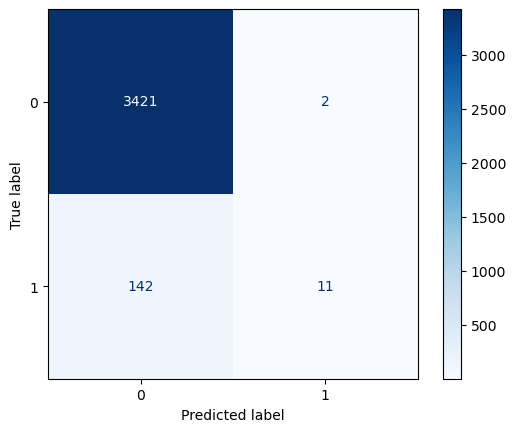

In [176]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds_binary)
print('Confusion Matrix:')
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
XGBClassifier(n_estimators=136, max_depth=4, learning_rate=.13, random_state=1)